In [54]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from nltk.corpus import stopwords
import pprint

In [4]:
features = ['Category',
'Item',
'Serving Size',
'Calories',
'Calories from Fat',
'Total Fat',
'Saturated Fat',
'Trans Fat',
'Cholesterol',
'Sodium',
'Carbohydrates',
'Dietary Fiber',
'Sugars',
'Protein',
'Vitamin A (% Daily Value)',
'Vitamin C (% Daily Value)',
'Calcium (% Daily Value)',
'Iron (% Daily Value)']

dataset = pd.read_csv('menu.csv',header=0,usecols=features)

In [5]:
dataset.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


In [42]:
df = dataset.drop(["Category","Item","Serving Size"],axis=1)
normalized_df=(df-df.mean())/df.std()
normalized_df["Category"] = dataset[["Category"]]
normalized_df.head(5)

,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Category
0,-0.284136,-0.055492,-0.082035,-0.189349,-0.475019,2.349713,0.440621,-0.578579,1.511262,-0.921313,0.320453,-0.140641,-0.323949,0.236600,0.832875,Breakfast
1,-0.492235,-0.446497,-0.433999,-0.565157,-0.475019,-0.343103,0.475282,-0.613975,1.511262,-0.921313,0.407971,-0.304802,-0.323949,0.236600,0.030423,Breakfast
2,0.007203,0.570114,0.621893,0.374362,-0.475019,-0.113927,0.492612,-0.649370,1.511262,-0.956181,0.057897,-0.222722,-0.323949,0.236600,0.259695,Breakfast
3,0.340162,0.961118,0.973857,0.750170,-0.475019,2.636183,0.631254,-0.613975,1.511262,-0.956181,0.670527,0.064559,-0.323949,0.530373,0.832875,Breakfast
4,0.132063,0.648315,0.621893,0.374362,-0.475019,-0.056633,0.665914,-0.613975,1.511262,-0.956181,0.670527,-0.304802,-0.323949,0.236600,0.259695,Breakfast
5,0.256923,0.648315,0.621893,0.562266,1.855262,2.808064,0.804556,-0.578579,1.511262,-0.921313,1.108120,0.064559,-0.248035,0.530373,1.406055,Breakfast
6,0.381782,0.804716,0.833072,1.313881,-0.475019,2.235125,1.393784,-0.330811,0.235521,-0.921313,0.495490,-0.140641,-0.020292,-0.350946,0.832875,Breakfast
7,0.631501,1.117520,1.114643,1.501785,-0.475019,2.235125,1.584416,-0.153834,0.873391,-0.886446,0.495490,0.064559,-0.020292,-0.057173,1.406055,Breakfast
8,0.173683,0.413712,0.410715,0.938073,-0.475019,-0.228515,1.393784,-0.401602,0.235521,-0.921313,0.583008,-0.468963,-0.020292,-0.350946,0.259695,Breakfast
9,0.423402,0.726516,0.762679,1.125977,-0.475019,-0.228515,1.601747,-0.189229,0.873391,-0.886446,0.583008,-0.304802,-0.020292,-0.350946,0.832875,Breakfast


In [6]:
len(dataset)

260

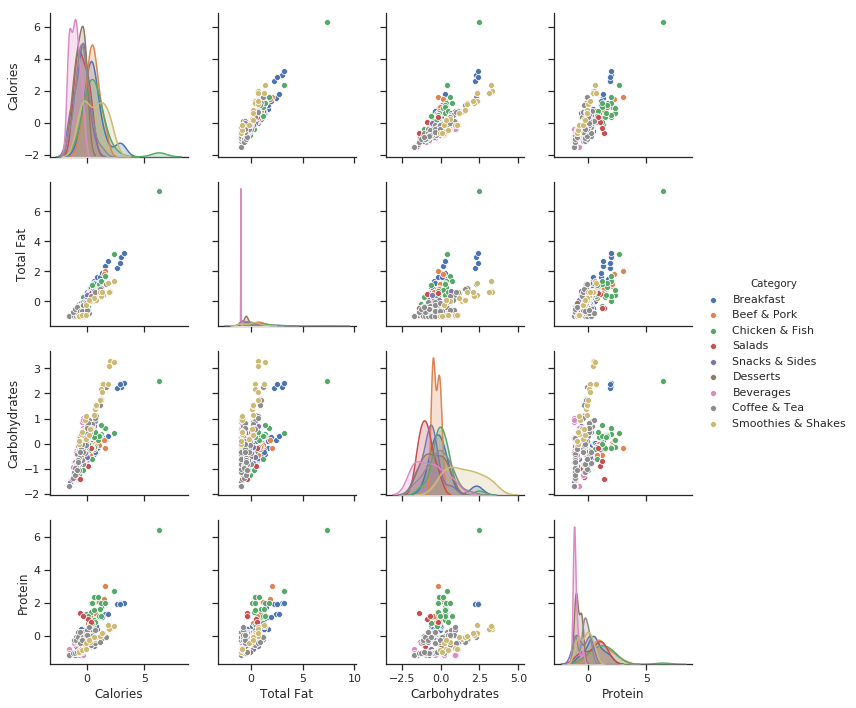

In [44]:
plotData = normalized_df[["Category","Calories","Total Fat","Carbohydrates","Protein"]]

sns.set(style="ticks")
sns.pairplot(plotData, hue="Category")

In [7]:
def topFoods(items,k):
    stop = stopwords.words('english')
    stop.append('&')
    stop.append('-')
    stop.append("With")
    stop.append("Small")
    stop.append("Medium")
    stop.append("Large")
    #remove parantheses!
    
    foods = items.split()
    words = [word for word in foods if word not in stop]

    #return foodList
    counter = Counter(words)
    return counter.most_common(k)


In [71]:
points = dataset.drop(['Category','Item','Serving Size'],axis=1)
points

clusterCount = 6
kmeans = KMeans(n_clusters=clusterCount)
clusters = kmeans.fit_predict(points)
clusterList = list(clusters)

In [72]:
dbScore = davies_bouldin_score(points,clusters)
dbScore

/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.6027521501491205

In [73]:
foodClusters = list(zip(list(dataset['Item'].values),clusterList))
foodClusters = pd.DataFrame(foodClusters,columns=['Item','Cluster'])

In [74]:
for i in range(clusterCount):
    foodText = list(foodClusters[foodClusters['Cluster'] == i]['Item'])
    pprint.pprint(foodText)
    print("----------------------------------------------------------")
    #print(topFoods(foodText,3))

['Bacon, Egg & Cheese Biscuit (Regular Biscuit)',
 'Bacon, Egg & Cheese Biscuit (Large Biscuit)',
 'Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)',
 'Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)',
 'Sausage Biscuit (Large Biscuit)',
 'Sausage Biscuit with Egg (Regular Biscuit)',
 'Sausage Biscuit with Egg (Large Biscuit)',
 'Sausage Biscuit with Egg Whites (Regular Biscuit)',
 'Sausage Biscuit with Egg Whites (Large Biscuit)',
 'Southern Style Chicken Biscuit (Regular Biscuit)',
 'Southern Style Chicken Biscuit (Large Biscuit)',
 'Steak & Egg Biscuit (Regular Biscuit)',
 'Bacon, Egg & Cheese McGriddles',
 'Bacon, Egg & Cheese McGriddles with Egg Whites',
 'Sausage, Egg & Cheese McGriddles',
 'Sausage, Egg & Cheese McGriddles with Egg Whites',
 'Bacon, Egg & Cheese Bagel',
 'Bacon, Egg & Cheese Bagel with Egg Whites',
 'Steak, Egg & Cheese Bagel',
 'Big Breakfast (Regular Biscuit)',
 'Big Breakfast with Egg Whites (Regular Biscuit)',
 'Big Breakfast with E

In [ ]:
#all possible religious tags
religions = ['catholic','other christian','muslim','buddhist',
             'hindu','ethnic','marxist','other']

#sum of flags tagged by respective religion
totalFlags = []

for religion in religions:
    index = religions.index(religion)
    religionCount = sum(dataset['religion'] == index)
    totalFlags.append(religionCount)
    
#reshape into dataframe
totalFlags = pd.DataFrame(np.array(totalFlags).reshape(1,len(religions)))
totalFlags.columns = religions

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(data=totalFlags)
ax.set(xlabel='religions', ylabel='amount')
sns.set(rc={'figure.figsize':(15,10)})
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))

In [ ]:
#we only care about these columns
columns = ['mainhue','bars','stripes','sunstars']
plotData = dataset[columns]
plotData.columns = columns

plotData

In [ ]:
#represent the flag colors on plot
flagColors = ['green','red','blue','gold','white','orange','black','brown']
sns.set_palette(flagColors)

sns.relplot(x="stripes", y="sunstars", hue="mainhue", size="bars",sizes=(100, 500), 
            alpha=0.9,height=6, data=plotData, palette=flagColors)

In [ ]:
landMasses = ['N. America','S. America','Europe','Africa','Asia','Oceania']
columns = ['landmass','bars','stripes','circles','crosses','saltires','quarters','sunstars',
          'crescent','triangle','icon','animate','text']
flagFeatsByLandmass = dataset[columns]

for i in range(1 , len(landMasses) + 1):
    landMassLabel = landMasses[i - 1]
    flagFeatsByLandmass.loc[flagFeatsByLandmass['landmass'] == i,'landmass'] = landMassLabel
    
flagFeatsByLandmass = pd.melt(flagFeatsByLandmass,id_vars="landmass",
                              var_name="feats",value_name="amount")
flagFeatsByLandmass

In [ ]:
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
g = sns.factorplot(x='amount', y='feats', hue='landmass', data=flagFeatsByLandmass, kind='bar',
                  size=10,aspect=2,ci=None)


In [ ]:
landFeatsColor = dataset.drop(columns=['name','zone','area','population','language','religion',
                                     'red','green','blue','gold','white','black','orange',
                                      'topleft','botright','colours','bars','stripes',
                                      'crosses','saltires','circles','quarters','sunstars',
                                      'crescent','triangle','icon','animate','text'])

for i in range(1,7):
    landFeatsColor.loc[landFeatsColor['landmass'] == i,'landmass'] = landMasses[i - 1]


colors = ['red','green','blue','gold','white','black','orange']

mainColorsByLandmass = []

for land in landMasses:
    landMainhue = []
    landmass = landFeatsColor[landFeatsColor['landmass'] == land]

    for color in colors:
        landMainhue.append(sum(landmass['mainhue'] == color))
    
    mainColorsByLandmass.append(landMainhue)


mainColorsByLandmass = pd.DataFrame(np.array(mainColorsByLandmass).reshape(6,len(colors)))
mainColorsByLandmass.columns = colors
mainColorsByLandmass['landmass'] = landMasses
mainColorsByLandmass = pd.melt(mainColorsByLandmass,id_vars="landmass",
                               var_name="mainhue",value_name="amount")

h = sns.factorplot(x='landmass', y='amount', hue='mainhue', data=mainColorsByLandmass, 
                   kind='bar',size=10,aspect=2,ci=None)

In [ ]:
land1 = dataset[dataset['landmass'] == 1]

#bars, stripes, colorDiff, crosses, saltires, quarters, sunstars, icon
columns = ['red','green','blue','gold','white','black','orange']
flagColors = []

for color in columns:
    flagColors.append(sum(land1[color]))

flagColors = pd.DataFrame(np.array(flagColors).reshape(1,len(columns)))
flagColors.columns = columns

flatui = ["#e50000", "#15b01a", "#0343df", "#dbb40c", "#ffffff", "#000000", "#f97306"]
sns.set_palette(flatui)

ax = sns.barplot(data=flagColors)
ax.set(xlabel='colors', ylabel='total')
sns.set(rc={'figure.figsize':(13,3)})


In [ ]:
landMasses = ['N. America','S. America','Europe','Africa','Asia','Oceania']
labels = ['circles','crosses','saltires','quarters','crescent',
          'triangle','icon','animate','text']

radarData = []

for i in range(1 , len(landMasses) + 1):
    land = dataset[dataset['landmass'] == i]

    flagFeatures = []

    for feat in labels:
        flagFeatures.append(np.mean(land[feat]))
    
    radarData.append(flagFeatures)

radarData = pd.DataFrame(np.array(radarData).reshape(len(landMasses), len(labels)))
radarData = radarData.T
radarData.columns = landMasses

radarData

In [ ]:
def radarPlot(row,color,land,labels):
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles = np.concatenate((angles,[angles[0]]))

    ax = plt.subplot(2,3,row+1, polar=True)
    
    ax.set_theta_offset(np.pi / 2)
    
    plt.xticks(angles[:-1], labels, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.10,0.20,0.30,0.40], 
               ["0.10","0.20","0.30","0.40"], color="grey", size=7)

    plt.ylim(0,0.50)

    stats = radarData[land].values
    stats = np.concatenate((stats,[stats[0]]))

    ax.plot(angles, stats, color=color,linewidth=2,linestyle='solid',label=land)
    ax.fill(angles, stats, color=color, alpha=0.4)

    title = land
    plt.title(title, size=11, color=color, y=1.1)

In [ ]:
plotDpi=96
plt.figure(figsize=(1600/plotDpi, 1000/plotDpi), dpi=plotDpi)

colors = ['royalblue','navy','goldenrod','olivedrab','darkred','limegreen']

i = 0
for land in landMasses:
    color = colors[i]
    radarPlot(i,color,land,labels)
    i+=1

In [ ]:
parallel_coordinates(radarData, 'landmass', colormap=plt.get_cmap("Set2"))
plt.show()